All variables used in a program are kept in the main memory and they are volatile, i.e., their values are lost when the program ends. Even if you write a program running forever, your data will be lost in case of a shutdown or a power failure.

Another drawback of the main memory is the capacity limitation. In the extreme case, when you need more than a couple of gigabytes for your variables, it will be difficult to keep all of them in the main memory. Especially, infrequently required variables are better kept on an external storage device instead of the main memory.

Files provide a mechanism for storing data persistently in hard drives which provide significantly larger storage than the main memory. These devices are also called secondary storage devices. The data you put in a file will stay on the hard drive until someone overwrites or deletes the file (or when the hard drive fails, which is a sad but rare case).

A File is a sequence of bytes stored on the secondary storage, typically hard drive (alternative secondary storage devices include CD, DVD, USB disk, tape drive). Data on a file has the following differences from data in memory (variables):

A file is just a sequence of bytes. Therefore, data in a file is unorganized, there is no data type, no variable boundaries.

Data needs to be be accessed indirectly, using I/O functions. E.g. updating a value in a file requires reading it in memory, updating in memory, then writing it into the file back.

Accessing and updating data is significantly slower since it is on an external device.

Keeping data on a file instead of the main memory has the following use cases:

Data needs to be persistent. Data will be in the file when you restart your program, reboot your machine or when you find your ancient laptop in the basement 30 years later (Probably it will not be there when a 3000BC archeologist finds your laptop on an excavation site. Hard disks are not that durable. So, persistency is bounded).

You need to exchange data with another program. Examples:

You download data from web and your program gets it as input.

You like to generate data in your program and put it on a spreadsheet for further processing.

You have large amount of data which does not fit in the main memory. In this case, you will probably use a library or software like a database management system to access data in a faster and organized way. Files are the most primitive, basic way of achieving it.

In this chapter, we will talk about simple file access so that you will learn about simple file operations like open, close, read, write. The examples of the chapter will create and modify files when run – we strongly encourage you to check the contents of the created files using the file access mechanism at the left-hand side.

# First Example

In [17]:
fpointer = open("firstexample.txt","w")
fpointer.write("hello\n")
fpointer.write("how are\n")
fpointer.write("you?\n")
fpointer.close()

### open()
Before you can read or write a file, you have to open it using Python's built-in open() function. This function creates a file object, which would be utilized to call other support methods associated with it.

### close()
The close() method of a file object flushes any unwritten information and closes the file object, after which no more writing can be done.

Python automatically closes a file when the reference object of a file is reassigned to another file. It is a good practice to use the close() method to close a file.

### write()
The write() method writes any string to an open file. It is important to note that Python strings can have binary data and not just text.

The write() method does not add a newline character ('\n') to the end of the string −

### read()
The read() method reads a string from an open file. It is important to note that Python strings can have binary data. apart from text data.

### tell() 
The tell() method tells you the current position within the file; in other words, the next read or write will occur at that many bytes from the beginning of the file.

### seek() 
Change stream position.

In [18]:
"""
file_object = open(file_name,access_mode)
"r" ---> Opens a file for reading only. The file pointer(imgeç) 
is placed at the beginning of the file

"r+" ---> Opens a file for both reading and writting. The file pointer
placed at the beginning of the file

"w" ---> Opens a file for writing only. Overwrites the file 
if the file exists. If the file does not exits, creates 
a new file for writing

"a" ---> Opens a file for appending. The file pointer is at the end of
the file if the file exists. That is, the file is in the append mode. 
If the file does not exist, it creates a new file for writing.

"a+" ---> Opens a file for both appending and reading. 
The file pointer is at the end of the file if the file exists.
The file opens in the append mode.
If the file does not exist, it creates a new file for reading and writing.

""";

# Example

In [1]:
fp = open("firstexample.txt","r") # The example file we created above
for i in range(3):
    content = fp.read(4)
    print("> ", content)
fp.close()

>  hell
>  o
ho
>  w ar


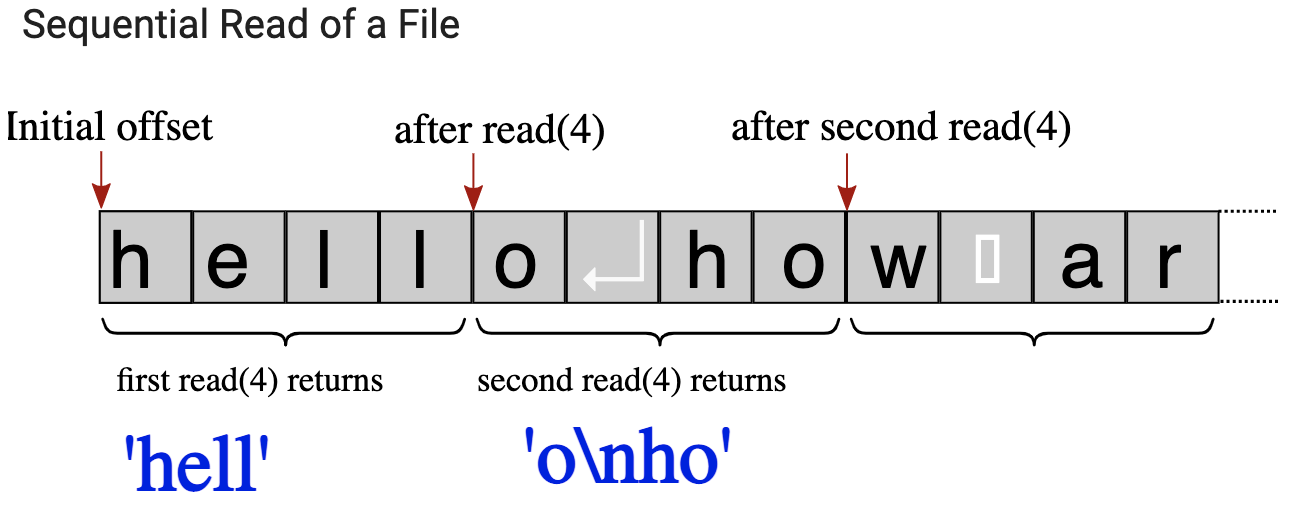

# Prepairing

## Data Conversion and Parsing

### Example:

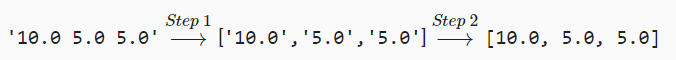

In [20]:
string = "10.0 5.0 5.0"
list1 = string.split(" ")
new_list = []
for i in list1:
    new_list += [float(i)]
print(new_list)

[10.0, 5.0, 5.0]


# Or

In [21]:
intlist = [10.0,5.0,5.0]
outlist = [str(num) for num in intlist]
print(" ".join(outlist))

10.0 5.0 5.0


In [26]:
string = "10.0 5.0 5.0"
liste = [float(i) for i in string.split(" ")]
print(liste)

[10.0, 5.0, 5.0]


# Accessing Text Files Line by Line

In [1]:
pointlist = [(0,0),(10,0),(10,10),(0,10)]
fp = open("pointlist.txt","w")
fp.write(str(len(pointlist)))
fp.write("\n")

for x,y in pointlist:
    fp.write(str(x))    
    fp.write(" ")       # Space as number separator 
    fp.write(str(y))
    fp.write("\n")
fp.close()
fp = open("pointlist.txt")
content = fp.read()
print(content)
fp.close()

4
0 0
10 0
10 10
0 10



# readline()

In [27]:
first = open("firstexample.txt","r")
selam = first.readline()  # read first line
print(selam)

hello



In [28]:
# To avoid "\n" use rstrip("\n")

In [30]:
"Sinan".rstrip("n")

'Sina'

In [23]:
fp = open("pointlist.txt")

nextline = fp.readline() # read the first line
while nextline != "":
    print(nextline)
    nextline = fp.readline()
fp.close()

4

0 0

10 0

10 10

0 10



Please note the empty lines between the each output line. This is due to '\n' character at the end of the string that readline() returns. In other words, readline() keeps the new line character it reads. print() puts an end of line after the output (this can bu suppressed by adding an end='' argument). As a result, we have extra end-of-line at the end of each line. In order to avoid it, you can call rstrip('\n') on the returned string to remove end of line. The new code will be:

In [30]:
"Sinan".rstrip("n")

'Sina'

In [2]:
"\n".rstrip("\n")

''

In [24]:
fp = open("pointlist.txt")              # open file for reading

nextline = fp.readline()                # read the first line
while nextline != '':                   # while read is successful
  nextline = nextline.rstrip('\n')      # remove occurrences of '\n' at the end
  print(nextline)                       # output the line
  nextline = fp.readline()              # read the nextline

fp.close()

4
0 0
10 0
10 10
0 10


In [5]:
fp = open("pointlist.txt")
pointlist = []
nextline = fp.readline() # we don't need this one (4)
nextline = fp.readline()
while nextline != "":
    nextline = nextline.rstrip("\n")  # Get rid of "\n"
    (x,y) = nextline.split(" ")
    x = float(x)
    y = float(y)
    pointlist.append((x,y))
    nextline = fp.readline()
fp.close()
print(pointlist)

[(0.0, 0.0), (10.0, 0.0), (10.0, 10.0), (0.0, 10.0)]


# Example

In [2]:
fp = open("twopointlists.txt","w")
fp.write("""3 0
3.4 2.1
5.1 3.2
EOLIST
1 1.5
2.0 2.5
""")
fp.close()

In [24]:
fp = open("twopointlists.txt")
liste1 = []
liste2 = []

nextline = fp.readline()
while nextline != "EOLIST\n":
    
    nextline = nextline.rstrip("\n")
    (x,y)= nextline.split(" ")
    (x,y) = (float(x),float(y))
    liste1.append((x,y))
    
    nextline = fp.readline()
nextline = fp.readline()
print("list1:" ,liste1)
while nextline != "":
    nextline = nextline.rstrip("\n")
    (x,y)= nextline.split(" ")
    (x,y) = (float(x),float(y))
    liste2.append((x,y))
    
    nextline = fp.readline()
print("list2:" ,liste2)

list1: [(3.0, 0.0), (3.4, 2.1), (5.1, 3.2)]
list2: [(1.0, 1.5), (2.0, 2.5)]


# Example: Processing CSV Files

In [26]:
"""
CSV stands for Comma Separated Value; 
it is a text-based format for exporting/importing spreadsheet 
(i.e. Excel) data. Each row in a CSV file is separated
by newlines and each column is separated by a comma ,. 
Actually, the format is more complex but for the time being,
let us ignore comma that might be appearing in strings 
and focus on a simple form as follows:
""";

In [2]:
content = '''Name,Surname,Grade
Han,Solo,80
Luke,Skywalker,90
Obi,Van Kenobi,88
Leya,Skywalker,91
Anakin,Skywalker,55
'''
fp = open("first.csv","w")
fp.write(content)
fp.close()

In [3]:
fp = open("first.csv","r")
line = fp.readline()
line = line.rstrip("\n")
colnames = line.split(",")

result = []
line = fp.readline()
while line != "":
    line = line.rstrip("\n")
    entry = {}
    c = 0
    for v in line.split(","):
        entry[colnames[c]] = v
        c += 1
    result.append(entry)
    line = fp.readline()
fp.close()
print(result)

[{'Name': 'Han', 'Surname': 'Solo', 'Grade': '80'}, {'Name': 'Luke', 'Surname': 'Skywalker', 'Grade': '90'}, {'Name': 'Obi', 'Surname': 'Van Kenobi', 'Grade': '88'}, {'Name': 'Leya', 'Surname': 'Skywalker', 'Grade': '91'}, {'Name': 'Anakin', 'Surname': 'Skywalker', 'Grade': '55'}]


# Calculate The Average

In [4]:
n = 0
sum = 0
for i in result:
    sum += float(i["Grade"])
    n += 1
average = sum/n


# Calculate the difference of each grade from the average

In [8]:
for entry in result:
    entry['Avgdiff'] = str(float(entry['Grade']) - average)
result

[{'Name': 'Han',
  'Surname': 'Solo',
  'Grade': '80',
  'Avgdiff': '-0.7999999999999972'},
 {'Name': 'Luke',
  'Surname': 'Skywalker',
  'Grade': '90',
  'Avgdiff': '9.200000000000003'},
 {'Name': 'Obi',
  'Surname': 'Van Kenobi',
  'Grade': '88',
  'Avgdiff': '7.200000000000003'},
 {'Name': 'Leya',
  'Surname': 'Skywalker',
  'Grade': '91',
  'Avgdiff': '10.200000000000003'},
 {'Name': 'Anakin',
  'Surname': 'Skywalker',
  'Grade': '55',
  'Avgdiff': '-25.799999999999997'}]

# Write the updated content into another CSV file

In [6]:
fp = open('second.csv', 'w')
colnames = entry.keys()                # this returns the keys (column names) of the CSV file
fp.write(','.join(colnames) + '\n')    # write this as the first line with comma separated values
for entry in result: # Go over each row
  vals = []
  for key in colnames: # Write each column on this row
    vals.append(entry[key])            # extract values of entry, entry.values() is a short version of this
  fp.write(','.join(vals) + '\n')
fp.close()